In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
df = pd.read_csv('../data/datasetIsolet.csv', header = None, sep = ';')

In [3]:
df = df[:].astype('float64')

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,617
0,1.0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,...,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,1.0,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,...,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,1.0,0.0362,0.7510,0.7188,1.0000,0.9358,0.9840,0.8072,0.4338,0.2290,...,0.3824,0.2206,0.5882,0.4412,-0.1470,-0.0148,0.0294,-0.0148,-0.3676,-0.7942
3,1.0,0.0220,0.6740,0.6082,0.9122,0.7680,1.0000,0.7932,0.5204,0.1786,...,0.3784,0.1216,0.2162,-0.0270,-0.1352,-0.1756,-0.4730,-0.3648,-0.3648,-0.4864
4,1.0,-0.9100,-0.3870,-0.3066,0.2048,0.1928,0.6852,0.5644,0.2782,0.1810,...,-0.2632,0.0000,-0.2808,-0.4736,-0.3508,-0.3860,-0.4210,-0.2280,-0.3860,-0.5614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,26.0,-0.0530,0.4206,1.0000,0.9814,-0.0778,-0.3084,-0.3208,-0.5016,-0.5514,...,-0.0802,-0.1094,-0.0218,-0.0218,-0.0510,-0.2700,-0.2700,-0.2116,-0.2700,-0.4598
1556,26.0,-0.2220,0.2000,0.9692,1.0000,0.2176,-0.0506,-0.2176,-0.3230,-0.2396,...,0.3866,0.3334,0.3600,0.5200,0.9200,0.7866,0.5200,0.2000,0.4400,0.1734
1557,26.0,-0.2776,0.2344,0.8278,1.0000,0.6364,-0.0862,-0.2966,-0.4066,-0.5168,...,-0.2760,-0.0798,-0.0920,-0.0184,0.4110,0.4234,0.1288,0.0184,-0.1902,-0.3988
1558,26.0,-0.1514,0.2626,0.8922,0.8886,-0.1966,-0.4714,-0.4608,-0.7670,-0.6244,...,0.9032,1.0000,0.8870,0.1774,0.1612,0.2580,0.3870,-0.0646,0.0000,-0.4516


In [5]:
df.columns[0:]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            608, 609, 610, 611, 612, 613, 614, 615, 616, 617],
           dtype='int64', length=618)

In [6]:
def isSparse(matrix,m,n):
    counter=0
    for i in range(m):
        for j in range(n):
            if (matrix[i][j] == 0):
                counter+=1
            
    return counter>((m*n)/2)

In [7]:
sparse = isSparse(df.values,df.shape[0],df.shape[1])

In [8]:
print("Is the dataset sparse? " +str(sparse))

Is the dataset sparse? False


In [9]:
corr=df.corr()

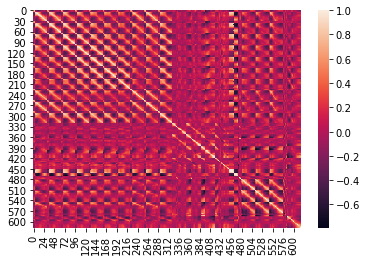

In [10]:
sns.heatmap(corr)

In [11]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [12]:
selected_columns = selected_columns[1:]

In [13]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [14]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [15]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(X.values,Y.values, SL, selected_columns)

In [16]:
result = pd.DataFrame()
result['label'] = df.iloc[:,0]

In [17]:
result

,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1555,26.0
1556,26.0
1557,26.0
1558,26.0


In [18]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [19]:
data

,1,2,22,33,84,118,161,163,199,210,...,578,579,580,581,582,597,599,602,603,611
0,-0.4394,-0.0930,0.9718,-0.4330,0.5958,0.8768,0.0070,0.3812,-0.4842,-0.0372,...,-1.0,1.0,-1.0,-1.0,-1.0,0.6154,0.8206,0.6924,0.4358,0.3846
1,-0.4348,-0.1198,0.9558,-0.2196,0.7652,1.0000,-0.2680,0.3946,-0.4414,0.3776,...,1.0,-1.0,-1.0,-1.0,-1.0,0.7272,0.4772,0.1818,0.4318,0.2046
2,0.0362,0.7510,0.8112,0.0132,0.7432,0.8258,-0.1022,0.7538,-0.4048,-0.4432,...,1.0,-1.0,-1.0,-1.0,-1.0,0.5148,0.8824,0.4706,0.1764,0.4412
3,0.0220,0.6740,0.2352,-0.0016,0.7152,0.6158,-0.3494,1.0000,0.2302,-0.2798,...,-1.0,-1.0,1.0,-1.0,-1.0,0.5406,0.5810,0.4460,-0.1486,-0.0270
4,-0.9100,-0.3870,0.9740,-0.9506,0.6780,0.8104,-0.8768,0.6576,-0.4982,-0.3298,...,-1.0,-1.0,1.0,-1.0,-1.0,0.7368,0.5790,0.5964,0.7720,-0.4736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,-0.0530,0.4206,0.6574,-0.1180,-0.1536,0.4802,0.0670,0.9786,-0.4984,-0.3656,...,-1.0,1.0,-1.0,1.0,-0.8,0.5036,0.8248,0.5182,0.3430,-0.0218
1556,-0.2220,0.2000,0.6308,-0.2990,0.9042,0.9188,-0.4586,0.3974,-0.1798,-0.1104,...,-1.0,-1.0,1.0,1.0,0.6,0.5200,0.6534,0.5466,0.5466,0.5200
1557,-0.2776,0.2344,0.4450,-0.4626,0.7800,0.9528,-0.4966,0.4416,-0.5252,-0.0168,...,-1.0,1.0,-1.0,0.4,0.6,0.9632,0.5092,0.7178,0.7056,-0.0184
1558,-0.1514,0.2626,0.4122,-0.3030,0.4992,0.8562,-0.2840,0.7702,-0.3108,-0.3854,...,-1.0,1.0,-1.0,1.0,-1.0,0.3870,0.6774,0.5162,0.6936,0.1774


0      -0.4394
1      -0.4348
2       0.0362
3       0.0220
4      -0.9100
         ...  
1555   -0.0530
1556   -0.2220
1557   -0.2776
1558   -0.1514
1559   -0.3470
Name: 1, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0    -0.4348
1.0    -0.4348
1.0    -0.4348
1.0    -0.4348
1.0    -0.4348
         ...  
26.0   -0.1540
26.0   -0.1540
26.0   -0.1540
26.0   -0.1540
26.0   -0.1540
Name: 1, Length: 1560, dtype: float64
0      -0.0930
1      -0.1198
2       0.7510
3       0.6740
4      -0.3870
         ...  
1555    0.4206
1556    0.2000
1557    0.2344
1558    0.2626
1559   -0.0470
Name: 2, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0    -0.1198
1.0    -0.1198
1.0    -0.1198
1.0    -0.1198
1.0    -0.1198
         ...  
26.0    0.4200
26.0    0.4200
26.0    0.4200
26.0    0.4200
26.0    0.4200
Name: 2, Length: 1560, dtype: float64
0       0.9718
1       0.9558
2       0.8112
3       0.2352
4       0.9740
         ... 

0       0.1392
1       0.7666
2       0.3270
3       0.8352
4       1.0000
         ...  
1555    0.3182
1556    0.9444
1557    0.7634
1558    0.8864
1559    0.6000
Name: 309, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0     0.7666
1.0     0.7666
1.0     0.7666
1.0     0.7666
1.0     0.7666
         ...  
26.0    0.9130
26.0    0.9130
26.0    0.9130
26.0    0.9130
26.0    0.9130
Name: 309, Length: 1560, dtype: float64
0       0.6202
1       1.0000
2       0.5576
3       0.7412
4       0.9000
         ...  
1555    0.5228
1556    0.9444
1557    0.7634
1558    0.7272
1559    0.7052
Name: 310, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0     1.0000
1.0     1.0000
1.0     1.0000
1.0     1.0000
1.0     1.0000
         ...  
26.0    0.8914
26.0    0.8914
26.0    0.8914
26.0    0.8914
26.0    0.8914
Name: 310, Length: 1560, dtype: float64
0       0.8988
1       0.9666
2       0.6346
3       0.8824
4       0.8000
     

Name: 362, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0    -0.9284
1.0    -0.9284
1.0    -0.9284
1.0    -0.9284
1.0    -0.9284
         ...  
26.0   -0.9804
26.0   -0.9804
26.0   -0.9804
26.0   -0.9804
26.0   -0.9804
Name: 362, Length: 1560, dtype: float64
0      -0.1482
1      -0.8994
2      -0.9744
3      -0.9754
4      -0.9070
         ...  
1555    0.1078
1556   -0.6132
1557   -0.4836
1558    0.0122
1559   -0.3558
Name: 363, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0    -0.8994
1.0    -0.8994
1.0    -0.8994
1.0    -0.8994
1.0    -0.8994
         ...  
26.0   -0.5666
26.0   -0.5666
26.0   -0.5666
26.0   -0.5666
26.0   -0.5666
Name: 363, Length: 1560, dtype: float64
0       0.6814
1       0.5772
2       0.5696
3       0.6560
4       0.2392
         ...  
1555    0.3660
1556    0.3402
1557    0.3426
1558    0.2606
1559    0.6308
Name: 365, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

Name: 512, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0    -0.0126
1.0    -0.0126
1.0    -0.0126
1.0    -0.0126
1.0    -0.0126
         ...  
26.0   -0.8032
26.0   -0.8032
26.0   -0.8032
26.0   -0.8032
26.0   -0.8032
Name: 512, Length: 1560, dtype: float64
0       0.3544
1       0.4984
2       0.2674
3       0.9084
4       0.8518
         ...  
1555    0.5854
1556   -0.2312
1557   -0.2734
1558    0.1722
1559    0.0840
Name: 530, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
label
1.0     0.4984
1.0     0.4984
1.0     0.4984
1.0     0.4984
1.0     0.4984
         ...  
26.0    0.4870
26.0    0.4870
26.0    0.4870
26.0    0.4870
26.0    0.4870
Name: 530, Length: 1560, dtype: float64
0       0.6536
1       0.1662
2       0.3024
3       0.4198
4       0.9260
         ...  
1555    0.8446
1556    0.4874
1557    0.3192
1558    0.4890
1559    0.4756
Name: 534, Length: 1560, dtype: float64
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

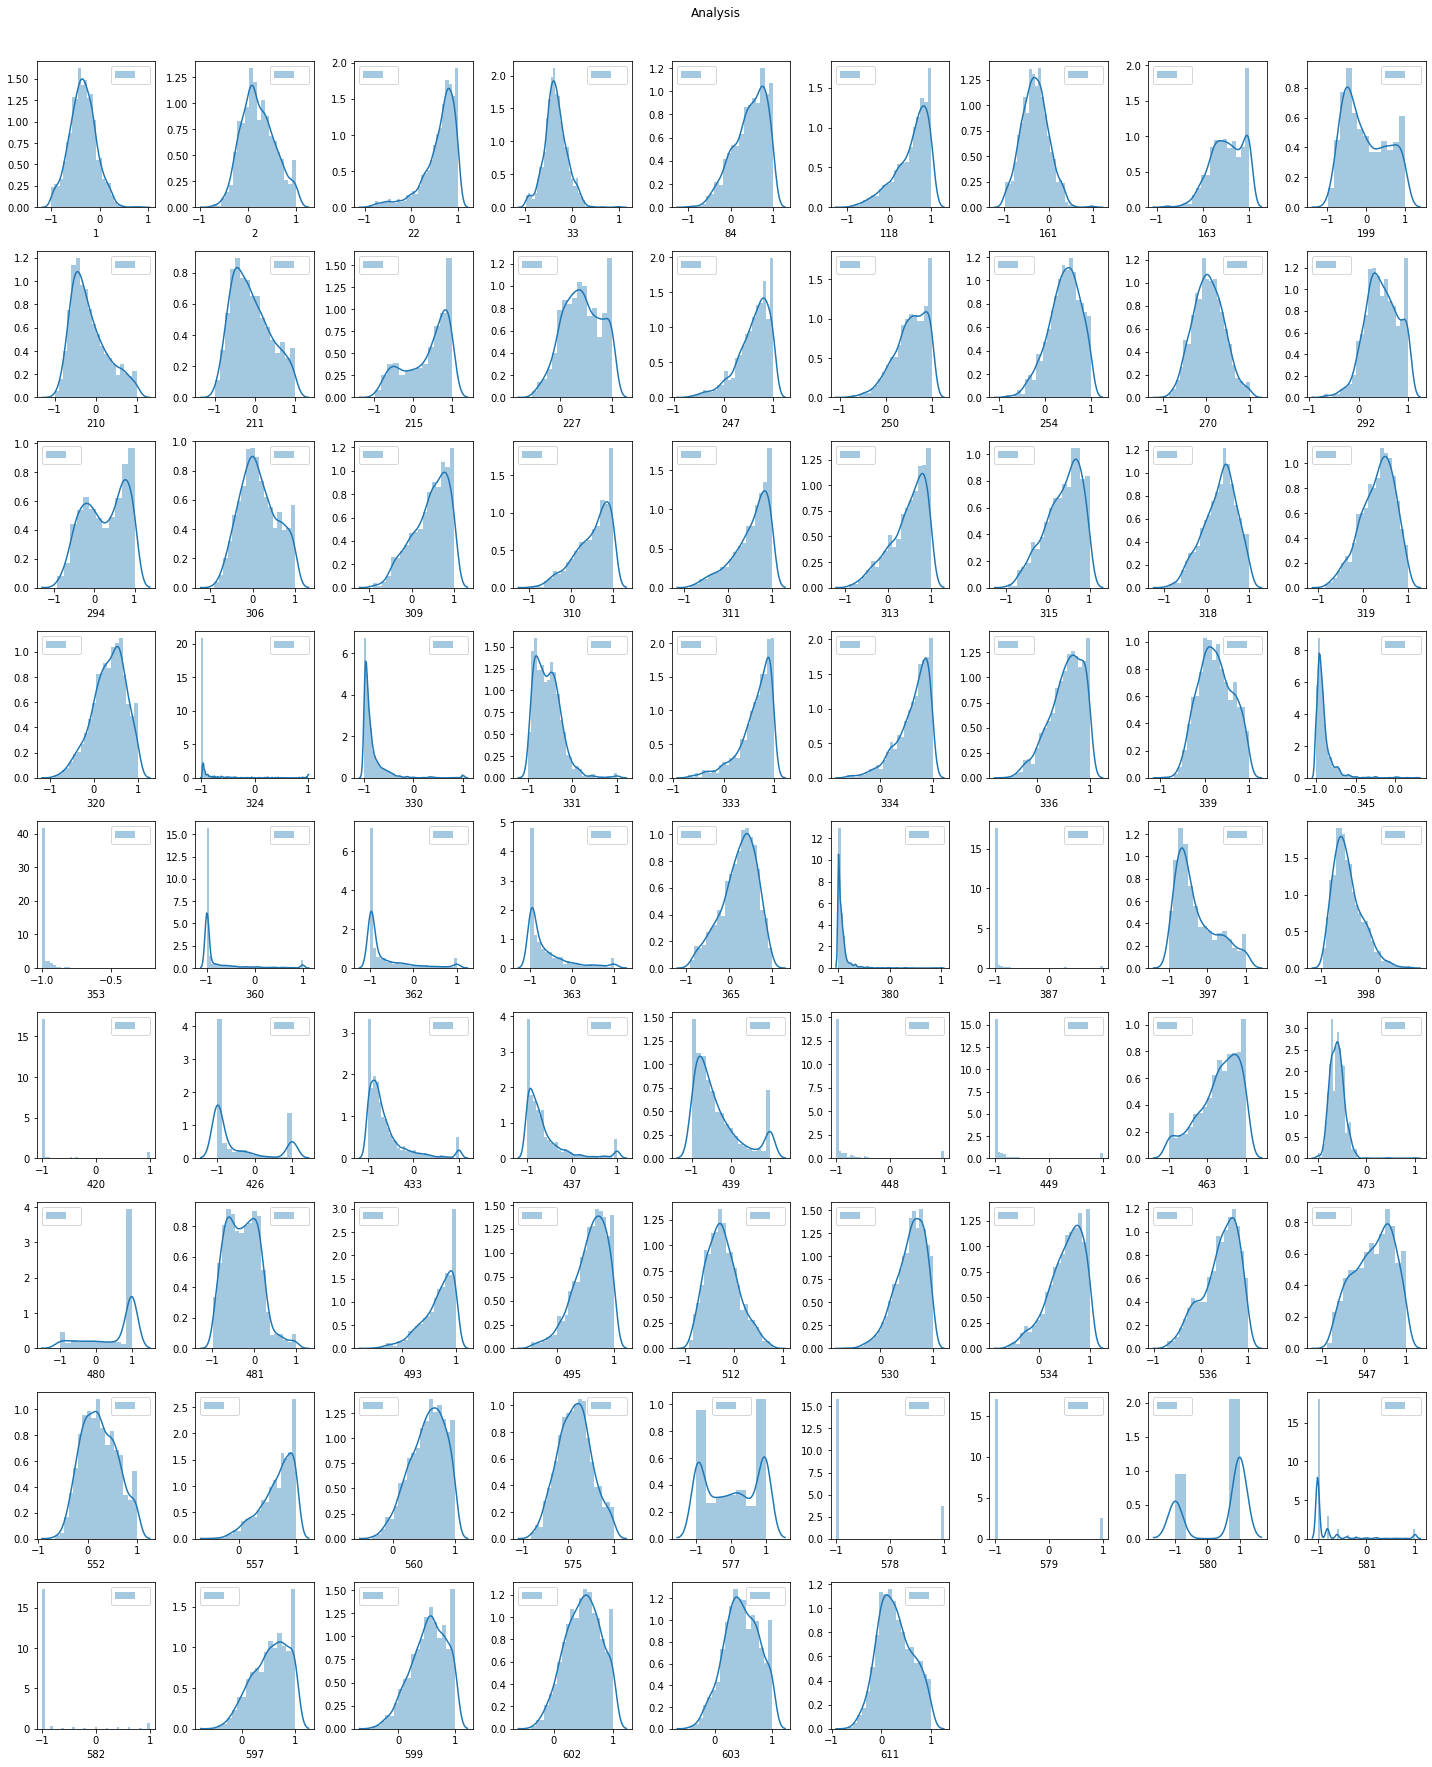

In [26]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(9, 9, j+1)
    j += 1
    sns.distplot(data[i], label=' ')
    print(data[i])
    print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
    print(data[i][result['label']])
    #sns.distplot(data[i][result['label']== 2], color='r',label=' ')
    #sns.distplot(data[i][result['label']== 1], color='g',label=' ')
    #sns.distplot(data[i][result['label']== 3], color='y',label=' ')
    plt.legend(loc='best')
fig.suptitle('Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()